<a href="https://colab.research.google.com/github/Nermen-Salama/python-learn/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mounting Google Drive**

In [21]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Dataset**

In [4]:
!wget --header="Host: s3-us-west-1.amazonaws.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://notebooks.githubusercontent.com/" "https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip" -c -O 'dogImages.zip'

--2021-12-14 23:33:17--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.117.48
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.117.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  51.5MB/s    in 22s     

2021-12-14 23:33:39 (50.1 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]



In [5]:
!unzip '/content/dogImages.zip'

Streaming output truncated to the last 5000 lines.
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03417.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03418.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03421.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03423.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03424.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03425.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03426.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03428.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03429.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03430.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03431.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03432.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03433.jpg  
  inflating: dogImages/train/048.Chihuahua/Chihuahua_03434.jpg  
  inflating: dogImages/train/048.Chihua

**Importing Libraries**

In [35]:
import numpy as np #Library that is used for dealing with arrays
import matplotlib.pyplot as plt #Library that is used for plotting
#import keras #Deep learning framework
from keras.layers import * #allows me to import the layers (CNN building blocks) from keras framework
from keras.models import * #import different keras models
from keras.preprocessing import image #helps me on data augmentation
from keras.preprocessing.image import ImageDataGenerator
from sklearn.datasets import load_files       
from keras.utils import np_utils
from glob import glob



**Dataset Description** 

In [18]:
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

train_files, train_targets = load_dataset('/content/dogImages/train')
valid_files, valid_targets = load_dataset('/content/dogImages/valid')
test_files, test_targets = load_dataset('/content/dogImages/test')

dog_names = [item[20:-1] for item in sorted(glob("/content/dogImages/train/*/"))]
num_classes=len(dog_names)
# Let's check the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


Read nine images!!


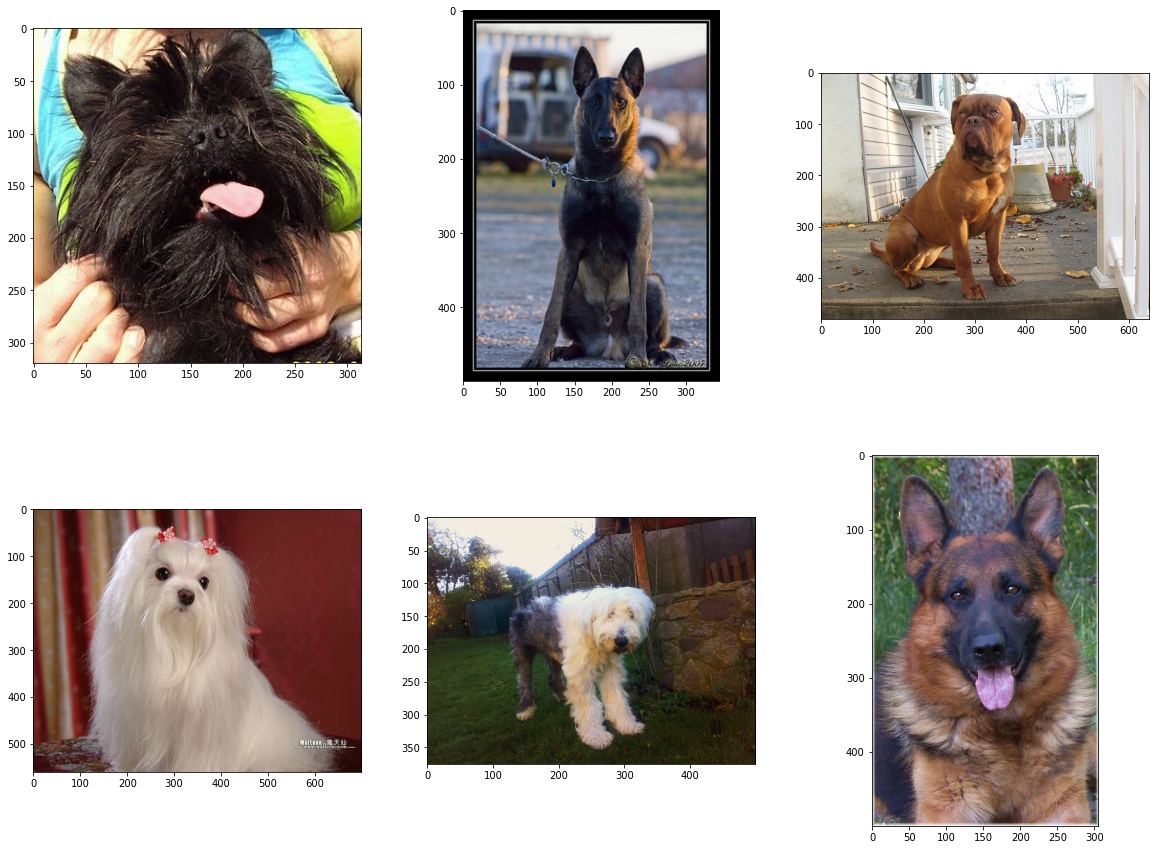

In [16]:
# Take nine images to visualize it's changes after every layer
import matplotlib.pyplot as plt
print("Read nine images!!")   
plt.figure(figsize=(20, 15))  
plt.subplot(2, 3, 1)
img1 = image.load_img('/content/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg')
plt.imshow(img1)
plt.subplot(2, 3, 2)
img1 = image.load_img('/content/dogImages/valid/020.Belgian_malinois/Belgian_malinois_01409.jpg')
plt.imshow(img1)
plt.subplot(2, 3, 3)
img1 = image.load_img('/content/dogImages/valid/060.Dogue_de_bordeaux/Dogue_de_bordeaux_04229.jpg')
plt.imshow(img1)
plt.subplot(2, 3, 4)
img1 = image.load_img('/content/dogImages/valid/101.Maltese/Maltese_06719.jpg')
plt.imshow(img1)
plt.subplot(2, 3, 5)
img1 = image.load_img('/content/dogImages/valid/113.Old_english_sheepdog/Old_english_sheepdog_07356.jpg')
plt.imshow(img1)
plt.subplot(2, 3, 6)
img1 = image.load_img('/content/dogImages/valid/071.German_shepherd_dog/German_shepherd_dog_04897.jpg')
plt.imshow(img1)


**Preprocessing**

In [41]:
train_dir ="/content/dogImages/train"
test_dir  ="/content/dogImages/test"
valid_dir  ="/content/dogImages/valid"

In [44]:
# Preprocessing data.
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [45]:
# set height and width and color of input image.
img_width,img_height =224,224
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)


Found 6680 images belonging to 133 classes.


In [43]:
test_generator=test_datagen.flow_from_directory(test_dir,shuffle=True,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)

Found 836 images belonging to 133 classes.


In [46]:
# validation data.
validation_generator = train_datagen.flow_from_directory(
   valid_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size) 

Found 835 images belonging to 133 classes.


**Deployement of Model (Model Building)**

In [23]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from keras.callbacks import ModelCheckpoint 
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

checkpointer = ModelCheckpoint(filepath='/content/drive/MyDrive/Dog Breed Identification/weights.best.Dog-Breed-Identification_custom_5.hdf5', 
                               verbose=1, save_best_only=True)

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 200 classes
predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])






87924736/87910968 [==============================] - 1s 0us/step


**Model Training_1**

In [70]:
# train the model on the new data for a few epochs
hist =model.fit(train_generator,
                        epochs=15, validation_data = validation_generator,
                          steps_per_epoch=10,callbacks=[checkpointer],verbose=1)

Epoch 1/15
10/10 [==============================] - ETA: 0s - loss: 1.2351 - accuracy: 0.6987
Epoch 00001: val_loss improved from inf to 1.28173, saving model to /content/drive/MyDrive/Dog Breed Identification/weights.best.Dog-Breed-Identification_custom_5.hdf5
10/10 [==============================] - 33s 3s/step - loss: 1.2351 - accuracy: 0.6987 - val_loss: 1.2817 - val_accuracy: 0.6802
Epoch 2/15
10/10 [==============================] - ETA: 0s - loss: 1.0588 - accuracy: 0.7406
Epoch 00002: val_loss improved from 1.28173 to 1.14975, saving model to /content/drive/MyDrive/Dog Breed Identification/weights.best.Dog-Breed-Identification_custom_5.hdf5
10/10 [==============================] - 25s 3s/step - loss: 1.0588 - accuracy: 0.7406 - val_loss: 1.1498 - val_accuracy: 0.7114
Epoch 3/15
10/10 [==============================] - ETA: 0s - loss: 0.8609 - accuracy: 0.7656
Epoch 00003: val_loss improved from 1.14975 to 0.88918, saving model to /content/drive/MyDrive/Dog Breed Identification/

**Model Fine Tuning**

In [71]:
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers from inception V3. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

0 input_1
1 conv2d
2 batch_normalization
3 activation
4 conv2d_1
5 batch_normalization_1
6 activation_1
7 conv2d_2
8 batch_normalization_2
9 activation_2
10 max_pooling2d
11 conv2d_3
12 batch_normalization_3
13 activation_3
14 conv2d_4
15 batch_normalization_4
16 activation_4
17 max_pooling2d_1
18 conv2d_8
19 batch_normalization_8
20 activation_8
21 conv2d_6
22 conv2d_9
23 batch_normalization_6
24 batch_normalization_9
25 activation_6
26 activation_9
27 average_pooling2d
28 conv2d_5
29 conv2d_7
30 conv2d_10
31 conv2d_11
32 batch_normalization_5
33 batch_normalization_7
34 batch_normalization_10
35 batch_normalization_11
36 activation_5
37 activation_7
38 activation_10
39 activation_11
40 mixed0
41 conv2d_15
42 batch_normalization_15
43 activation_15
44 conv2d_13
45 conv2d_16
46 batch_normalization_13
47 batch_normalization_16
48 activation_13
49 activation_16
50 average_pooling2d_1
51 conv2d_12
52 conv2d_14
53 conv2d_17
54 conv2d_18
55 batch_normalization_12
56 batch_normalization_14
5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)



                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, None, None,   122880      ['mixed4[0][0]']                 
                                160)                                                              
                                                                                                  
 batch_normalization_44 (BatchN  (None, None, None,   480        ['conv2d_44[0][0]']              
 ormalization)                  160)                                                              
                                                                                                  
 activation_44 (Activation)     (None, None, None,   0           ['batch_normalization_44[0][0]'] 
                                160)                                                              
         

**Model Training_2**

In [72]:
# we train our model again (this time fine-tuning the top 2 inception blocks
# alongside the top Dense layers
hist = model.fit(train_generator,
                        epochs=15, validation_data = validation_generator,
                          steps_per_epoch=10,callbacks=[checkpointer],verbose=1)


Epoch 1/15
10/10 [==============================] - ETA: 0s - loss: 1.0434 - accuracy: 0.7094
Epoch 00001: val_loss did not improve from 0.78122
10/10 [==============================] - 68s 3s/step - loss: 1.0434 - accuracy: 0.7094 - val_loss: 0.9063 - val_accuracy: 0.7425
Epoch 2/15
10/10 [==============================] - ETA: 0s - loss: 1.0496 - accuracy: 0.6969
Epoch 00002: val_loss did not improve from 0.78122
10/10 [==============================] - 22s 2s/step - loss: 1.0496 - accuracy: 0.6969 - val_loss: 0.8701 - val_accuracy: 0.7521
Epoch 3/15
10/10 [==============================] - ETA: 0s - loss: 1.0844 - accuracy: 0.6938
Epoch 00003: val_loss did not improve from 0.78122
10/10 [==============================] - 23s 2s/step - loss: 1.0844 - accuracy: 0.6938 - val_loss: 0.8161 - val_accuracy: 0.7605
Epoch 4/15
10/10 [==============================] - ETA: 0s - loss: 0.9360 - accuracy: 0.7344
Epoch 00004: val_loss improved from 0.78122 to 0.78102, saving model to /content/dri

**Save the trained model**

In [79]:
model.save("/content/drive/MyDrive/Dog Breed Identification/weights.best.Dog-Breed-Identification_custom_6.h5")

**Plotting training accuracy**

In [74]:
model.metrics_names

['loss', 'accuracy']

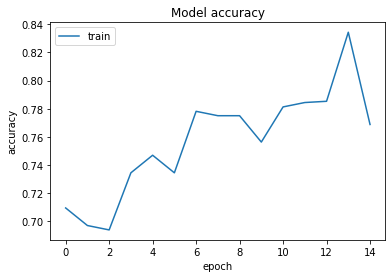

In [75]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

**Plotting validation accuracy**

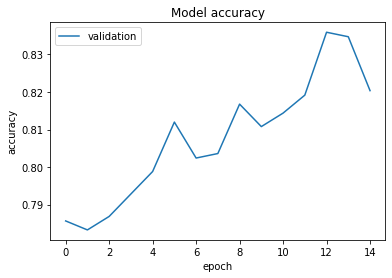

In [ ]:
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['validation'],loc='upper left')
plt.show()

**Getting Results**

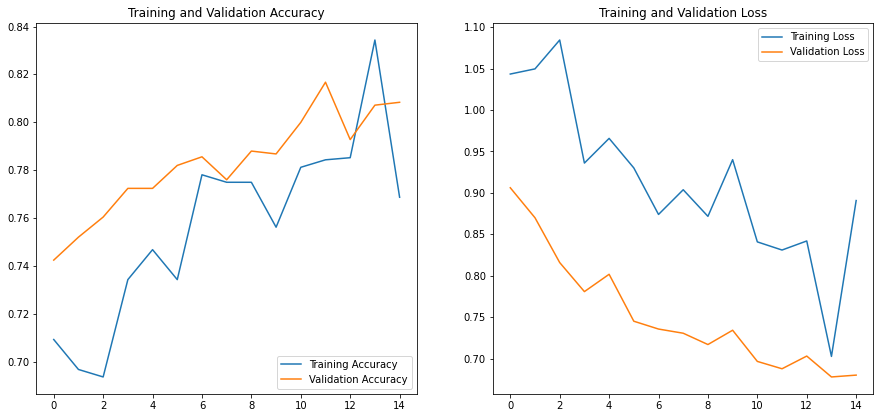

In [76]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs_range = range(15)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [54]:
dog_breed=list(train_generator.class_indices.keys())
dog_breed

['001.Affenpinscher',
 '002.Afghan_hound',
 '003.Airedale_terrier',
 '004.Akita',
 '005.Alaskan_malamute',
 '006.American_eskimo_dog',
 '007.American_foxhound',
 '008.American_staffordshire_terrier',
 '009.American_water_spaniel',
 '010.Anatolian_shepherd_dog',
 '011.Australian_cattle_dog',
 '012.Australian_shepherd',
 '013.Australian_terrier',
 '014.Basenji',
 '015.Basset_hound',
 '016.Beagle',
 '017.Bearded_collie',
 '018.Beauceron',
 '019.Bedlington_terrier',
 '020.Belgian_malinois',
 '021.Belgian_sheepdog',
 '022.Belgian_tervuren',
 '023.Bernese_mountain_dog',
 '024.Bichon_frise',
 '025.Black_and_tan_coonhound',
 '026.Black_russian_terrier',
 '027.Bloodhound',
 '028.Bluetick_coonhound',
 '029.Border_collie',
 '030.Border_terrier',
 '031.Borzoi',
 '032.Boston_terrier',
 '033.Bouvier_des_flandres',
 '034.Boxer',
 '035.Boykin_spaniel',
 '036.Briard',
 '037.Brittany',
 '038.Brussels_griffon',
 '039.Bull_terrier',
 '040.Bulldog',
 '041.Bullmastiff',
 '042.Cairn_terrier',
 '043.Canaan_do

In [77]:
test_generator

In [80]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('/content/drive/MyDrive/Dog Breed Identification/weights.best.Dog-Breed-Identification_custom_6.h5')

Files and directories in a specified path:
/content/dogImages/test/103.Mastiff/Mastiff_06827.jpg


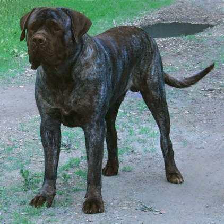

103.Mastiff
/content/dogImages/test/103.Mastiff/Mastiff_06878.jpg


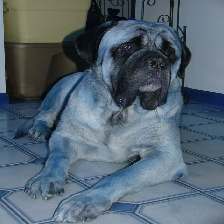

103.Mastiff
/content/dogImages/test/103.Mastiff/Mastiff_06873.jpg


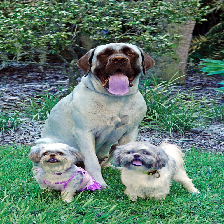

KeyboardInterrupt: ignored

In [81]:
import os
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from keras.preprocessing import image
 
path_of_the_directory= '/content/dogImages/test/'
print("Files and directories in a specified path:")
for filename in os.listdir(path_of_the_directory):
    f = os.path.join(path_of_the_directory,filename)
    for filename1 in os.listdir(f):
      f1 = os.path.join(f,filename1)
      if os.path.isfile(f1):
        print(f1)
        img=image.load_img(f1,target_size=(224,224))
        img=image.img_to_array(img)
        cv2_imshow(img)
        img=np.expand_dims(img,axis=0)
        prediction=model.predict(test_generator)
        print(filename)
        

In [82]:
prediction=model.predict(img, verbose=1)

1/1 [==============================] - 1s 1s/step


In [83]:
prediction

array([[5.17580601e-22, 9.04632791e-24, 2.34617340e-28, 1.02416501e-15,
        1.95687032e-22, 2.39570299e-17, 7.26394534e-15, 1.35033933e-14,
        2.94133229e-15, 2.72681508e-13, 2.55857371e-24, 2.24447252e-20,
        4.40528639e-29, 4.78928537e-22, 1.34597812e-29, 5.48303111e-22,
        9.83218265e-38, 2.52253006e-33, 5.34086689e-26, 4.54624047e-34,
        0.00000000e+00, 1.39613944e-23, 4.62442584e-12, 3.72852105e-21,
        0.00000000e+00, 1.76448544e-34, 5.11093672e-24, 5.66094805e-36,
        1.84102035e-20, 6.71527654e-17, 3.02485066e-24, 7.47063457e-23,
        1.55902084e-32, 2.31116606e-20, 5.66138133e-28, 2.44965760e-37,
        3.98237470e-17, 1.78552821e-28, 6.58619737e-09, 1.77955775e-36,
        7.39388282e-24, 0.00000000e+00, 5.76115897e-14, 3.73238817e-38,
        1.49764590e-14, 2.27491234e-10, 1.83133370e-12, 1.12429582e-18,
        3.35278033e-24, 1.55892039e-31, 0.00000000e+00, 3.77839771e-25,
        7.10994615e-25, 2.23883328e-16, 7.70472688e-14, 1.223259

In [84]:
score = model.evaluate(test_generator, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Test loss: 0.7272547483444214
Test accuracy: 78.70813608169556
